<a href="https://colab.research.google.com/github/madhu-80019/2420080019_Practical/blob/main/ML_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


iris = load_iris()
X, y = iris.data, iris.target

def k_fold_cv(X, y, k=5, n_neighbors=3):
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size
        X_test, y_test = X[start:end], y[start:end]
        X_train = np.vstack([X[:start], X[end:]])
        y_train = np.hstack([y[:start], y[end:]])

        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    return np.mean(accuracies)


In [ ]:
avg_accuracy = k_fold_cv(X, y, k=5)
print(f"Average k-NN accuracy (k-Fold CV): {avg_accuracy:.3f}")

Average k-NN accuracy (k-Fold CV): 0.907


In [ ]:
def bootstrap_regression(X, y, n_bootstraps=1000):
    n_samples = len(X)
    coefs = []
    for _ in range(n_bootstraps):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        X_boot = X[indices]
        y_boot = y[indices]
        model = LinearRegression()
        model.fit(X_boot, y_boot)
        coefs.append(model.coef_)
        return np.array(coefs)
X_reg = X[:, :2]
y_reg = X[:, 2]
coefs = bootstrap_regression(X_reg, y_reg, n_bootstraps=500)

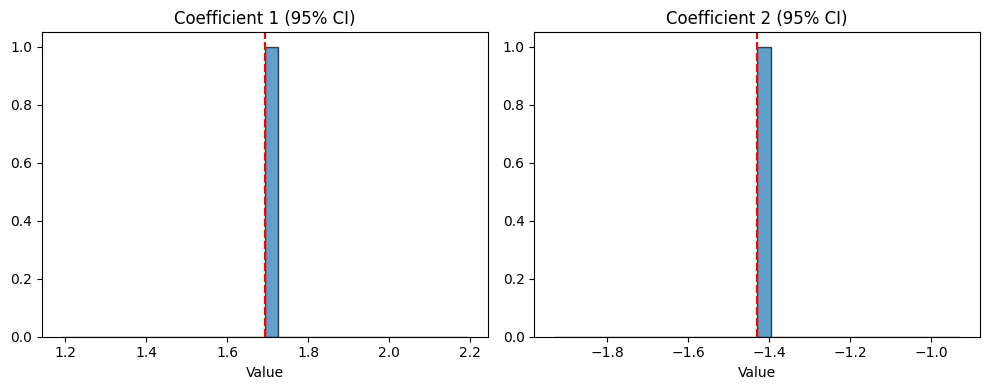

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(coefs[:, 0], bins=30, alpha=0.7, edgecolor='black')
plt.axvline(np.percentile(coefs[:, 0], 2.5), color='red', linestyle='--')
plt.axvline(np.percentile(coefs[:, 0], 97.5), color='red', linestyle='--')
plt.title('Coefficient 1 (95% CI)')
plt.xlabel('Value')
plt.subplot(1, 2, 2)
plt.hist(coefs[:, 1], bins=30, alpha=0.7, edgecolor='black')
plt.axvline(np.percentile(coefs[:, 1], 2.5), color='red', linestyle='--')
plt.axvline(np.percentile(coefs[:, 1], 97.5), color='red', linestyle='--')
plt.title('Coefficient 2 (95% CI)')
plt.xlabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
print(f"\nBootstrap results (95% confidence intervals):")
for i in range(coefs.shape[1]):
    lower = np.percentile(coefs[:, i], 2.5)
    upper = np.percentile(coefs[:, i], 97.5)
    print(f"Coefficient {i+1}: [{lower:.3f}, {upper:.3f}]")


Bootstrap results (95% confidence intervals):
Coefficient 1: [1.693, 1.693]
Coefficient 2: [-1.430, -1.430]
